### Different model testing

In [17]:
# Import Data Manipulation Libraries
import pandas as pd
import numpy as np

# Import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt


In [22]:
# Data ingestion 
def data_ingestion():
    df = pd.read_csv(r"C:\ML\Developer-Productivity-Analysis-Model\Data\raw\Ai_Developer.csv")
    return df 

In [30]:
df = data_ingestion()
df.sample(5)

,Hours_Coding,Lines_of_Code,Bugs_Found,Bugs_Fixed,AI_Usage_Hours,Sleep_Hours,Cognitive_Load,Task_Success_Rate,Coffee_Intake,Stress_Level,Task_Duration_Hours,Commits,Errors
605,10,478,13,10,1,5.8,49,58,5,65,11.8,41,2
590,3,200,2,0,1,7.7,89,30,7,89,3.0,10,0
612,4,358,3,0,6,6.0,24,100,5,30,2.7,14,4
248,3,161,13,9,4,6.0,43,80,7,55,5.8,7,1
793,4,198,6,0,2,6.6,70,33,2,84,8.5,18,5


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
# Data Preprocessing
def data_preprocessing(df):

    # Spliting data in X and y 
    X = df.drop(columns='Task_Success_Rate', axis= 1)
    y = df['Task_Success_Rate']
    
    # train test split
    X_train ,X_test , y_train ,y_test = train_test_split(X ,y , test_size= 0.3 , random_state= 42)

    # Scaling
    
    sc = MinMaxScaler()
    X_train = sc.fit_transform(X_train)
    X_test =sc.transform(X_test)

    return X_train ,X_test , y_train ,y_test

In [34]:
# Calling function data preprocessing
X_train ,X_test , y_train ,y_test = data_preprocessing(df)

In [56]:
X_train

array([[0.2       , 0.15544041, 0.        , ..., 0.12222222, 0.12244898,
        0.        ],
       [0.5       , 0.20518135, 0.26315789, ..., 0.34814815, 0.14285714,
        1.        ],
       [0.4       , 0.37305699, 0.21052632, ..., 0.08518519, 0.20408163,
        1.        ],
       ...,
       [0.        , 0.07668394, 1.        , ..., 0.03333333, 0.10204082,
        0.33333333],
       [0.6       , 0.16683938, 0.89473684, ..., 0.13333333, 0.26530612,
        0.22222222],
       [0.9       , 0.26321244, 0.21052632, ..., 0.37407407, 0.83673469,
        0.33333333]], shape=(700, 12))

In [59]:
# Testing different models
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor , AdaBoostRegressor , GradientBoostingRegressor 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score , mean_squared_error ,mean_absolute_error ,root_mean_squared_error

# Model Testing
def model_testing(X_train ,X_test , y_train ,y_test):
    report = []
    models = { 
        "Linear Regression " : LinearRegression(),
        "Decision Tree Regressor" : DecisionTreeRegressor(),
        "Random Forest Regressor" : RandomForestRegressor(),
        "Ada Boost Regressor" : AdaBoostRegressor(),
        "Gradient Boost Regressor" : GradientBoostingRegressor(),
        "SVR" : SVR(),
        "K neighbor Regressor " : KNeighborsRegressor()
    }

    for model_name , model in models.items():

        #train
        model_s = model.fit(X_train,y_train)

        #pred
        y_pred = model_s.predict(X_test)

        # Metrics
        r2score = r2_score(y_test,y_pred)
        MSE = mean_squared_error(y_test,y_pred)
        MAE = mean_absolute_error(y_test,y_pred)
        RMSE = root_mean_squared_error(y_test,y_pred)
        
        report.append({
            "Model Name" : model_name , 
            "R2 score" : r2score,
            "MSE" : MSE,
            "MAE" : MAE,
            "RMSE" : RMSE
        })
        Model_report = pd.DataFrame(report)

    return Model_report


In [60]:
model_report = model_testing(X_train ,X_test , y_train ,y_test)

model_report

,Model Name,R2 score,MSE,MAE,RMSE
0,Linear Regression,0.932657,27.026088,4.257934,5.198662
1,Decision Tree Regressor,0.871523,51.560000,5.300000,7.180529
2,Random Forest Regressor,0.942071,23.248039,3.790867,4.821622
3,Ada Boost Regressor,0.933403,26.726640,4.293896,5.169781
4,Gradient Boost Regressor,0.946913,21.304565,3.628683,4.615687
5,SVR,0.878668,48.692792,5.716345,6.978022
6,K neighbor Regressor,0.861932,55.408933,5.959333,7.443718


Among all evaluated models, Random Forest Regressor achieved the highest R² score and lowest RMSE. This indicates its ability to capture non-linear relationships between human factors, work patterns, and task success more effectively than linear models. Therefore, Random Forest was selected as the final model.

In [51]:
rf = RandomForestRegressor().fit(X_train,y_train)
y_pred = rf.predict(X_test)
r2sc = r2_score(y_test,y_pred)
r2sc


0.9419126387918282

In [53]:
# cross validation
from sklearn.model_selection import cross_val_score
scrores = cross_val_score(rf,X ,y, cv=10)
scrores

array([0.95549876, 0.95580427, 0.95217992, 0.95876325, 0.94234312,
       0.94441256, 0.93127128, 0.95039062, 0.94889547, 0.93791852])

<Axes: xlabel='Task_Success_Rate'>

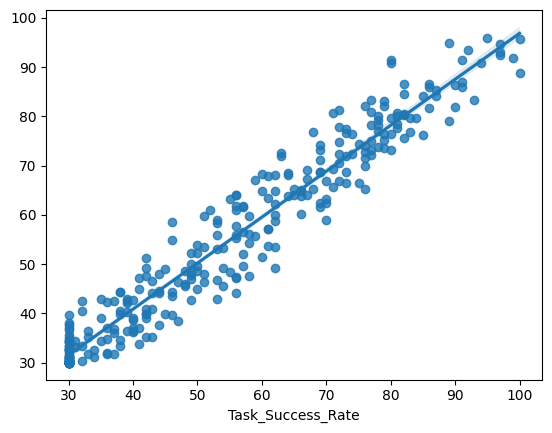

In [54]:
sns.regplot(x=y_test,y=y_pred)

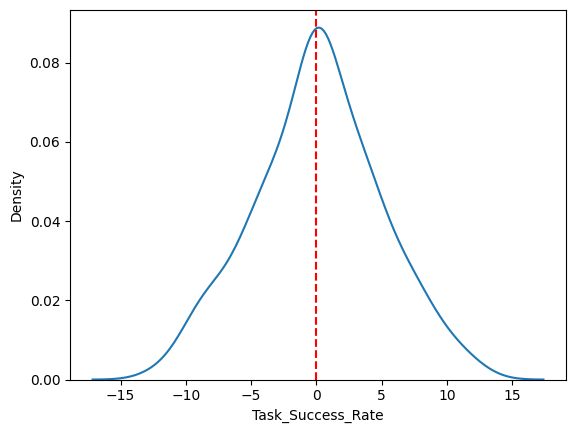

In [57]:
sns.kdeplot(y_test-y_pred)
plt.axvline(0,linestyle='--',color='red')